In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
# Read in the data and clean it up
df = pd.DataFrame()
dfs = []
sample_types = ['plant', 'rock']

for sample_type in sample_types:
    sample_df = pd.read_csv(f'{sample_type}.csv').set_index('Sample').transpose()
    sample_df['Sample type'] = sample_type
    dfs.append(sample_df)

for i in range(1, len(dfs)):
    dfs[i].columns = dfs[0].columns
# df = pd.concat(dfs, keys=sample_types, names=['Sample type', 'Sample name'])
df = pd.concat(dfs)

In [100]:
display(df)

Sample                      ppb Pb  206Pb/204Pb  ± (2s)  206Pb/207Pb  ± (2s)  \
Sample type Sample name                                                        
plant       ML 24-01          5.06        18.69    0.03        1.194   0.001   
            ML 24-02          1.83        18.58    0.03        1.187   0.001   
            ML 24-03          0.19        18.44    0.03        1.180   0.001   
            WT 24-04          4.70        19.11    0.03        1.219   0.001   
            WT 24-05          0.94        18.47    0.03        1.177   0.001   
            LL 24-08          1.33        19.00    0.06        1.206   0.001   
            LL 24-10         37.00        18.79    0.03        1.199   0.001   
            HL 24-11          1.24        18.49    0.04        1.183   0.001   
            HL 24-12          2.03        18.71    0.03        1.195   0.001   
            RS 24-13          1.01        18.65    0.04        1.190   0.001   
            RS 24-14         31.83        18.70    0.05        1.194   0.001   
            RS 24-15          5.04        18.55    0.03        1.188   0.001   
            RS 24-16          2.84        18.60    0.03        1.190   0.001   
            DS 24-17          0.64        18.90    0.04        1.205   0.001   
rock        ML 24 S-01     2982.50        18.76    0.03        1.200   0.001   
            ML 24 S-03     8854.90        19.13    0.03        1.220   0.001   
            WT 24 S-04    11411.30        19.22    0.03        1.224   0.001   
            WT 24 S-05     9459.00        19.18    0.03        1.223   0.001   
            LL 24 S-06     4130.60        19.10    0.03        1.220   0.001   
            LL 24 S-07    11249.50        18.93    0.03        1.210   0.001   
            HL 24 S-08     3240.20        20.51    0.04        1.303   0.001   
            HL 24 S-09     7807.20        19.30    0.04        1.230   0.001   
            RS 24 S-12     2756.70        19.45    0.04        1.237   0.001   
            RS 24 S-13   132054.90        19.00    0.03        1.214   0.001   
            DS 24 S-14     2426.60        19.65    0.04        1.244   0.001   
            DS 24 S-15     8174.30        19.12    0.03        1.218   0.001   

Sample                   206Pb/208Pb  ± (2s)  87Sr/86Sr   ± (2s)  ppb Sr  \
Sample type Sample name                                                    
plant       ML 24-01          0.4858  0.0009   0.708889  0.00002   748.9   
            ML 24-02          0.4845  0.0009   0.708955  0.00002   665.7   
            ML 24-03          0.4833  0.0009   0.716575  0.00002    14.5   
            WT 24-04          0.4893  0.0009   0.708392  0.00002   753.0   
            WT 24-05          0.4821  0.0009   0.709862  0.00002    33.7   
            LL 24-08          0.4890  0.0009   0.708571  0.00002   228.1   
            LL 24-10          0.4844  0.0009   0.706651  0.00002  1641.7   
            HL 24-11          0.4835  0.0009   0.707853  0.00002   495.2   
            HL 24-12          0.4863  0.0009   0.707936  0.00002     7.0   
            RS 24-13          0.4864  0.0009   0.718928  0.00002  5292.6   
            RS 24-14          0.4880  0.0009   0.714938  0.00002     0.0   
            RS 24-15          0.4854  0.0009   0.718716  0.00002  2934.3   
            RS 24-16          0.4846  0.0009   0.716381  0.00002     0.4   
            DS 24-17          0.4882  0.0009   0.710565  0.00002     0.9   
rock        ML 24 S-01        0.4893  0.0009   0.708884  0.00002   768.0   
            ML 24 S-03        0.4915  0.0009   0.708664  0.00002   434.0   
            WT 24 S-04        0.4933  0.0009   0.706718  0.00002    55.5   
            WT 24 S-05        0.4943  0.0009   0.708017  0.00002   157.7   
            LL 24 S-06        0.4911  0.0009   0.706146  0.00002   620.6   
            LL 24 S-07        0.4894  0.0009   0.707840  0.00002   154.2   
            HL 24 S-08        0.5120  0.0009   0.708175  0.00002   351.3   
           

In [ ]:
grouped_by_location = df.groupby(by=lambda name: name[:2], level='Sample name')

In [107]:
import seaborn as sns

In [113]:
# Reset the index to use the groupby keys as a column
df_reset = df.reset_index()

df_reset

Sample,index,ppb Pb,206Pb/204Pb,± (2s),206Pb/207Pb,± (2s),206Pb/208Pb,± (2s),87Sr/86Sr,± (2s),ppb Sr,Sample type
0,ML 24-01,5.06,18.69,0.03,1.194,0.001,0.4858,0.0009,0.708889,0.00002,748.9,plant
1,ML 24-02,1.83,18.58,0.03,1.187,0.001,0.4845,0.0009,0.708955,0.00002,665.7,plant
2,ML 24-03,0.19,18.44,0.03,1.180,0.001,0.4833,0.0009,0.716575,0.00002,14.5,plant
3,WT 24-04,4.70,19.11,0.03,1.219,0.001,0.4893,0.0009,0.708392,0.00002,753.0,plant
4,WT 24-05,0.94,18.47,0.03,1.177,0.001,0.4821,0.0009,0.709862,0.00002,33.7,plant
5,LL 24-08,1.33,19.00,0.06,1.206,0.001,0.4890,0.0009,0.708571,0.00002,228.1,plant
6,LL 24-10,37.00,18.79,0.03,1.199,0.001,0.4844,0.0009,0.706651,0.00002,1641.7,plant
7,HL 24-11,1.24,18.49,0.04,1.183,0.001,0.4835,0.0009,0.707853,0.00002,495.2,plant
8,HL 24-12,2.03,18.71,0.03,1.195,0.001,0.4863,0.0009,0.707936,0.00002,7.0,plant
9,RS 24-13,1.01,18.65,0.04,1.190,0.001,0.4864,0.0009,0.718928,0.00002,5292.6,plant


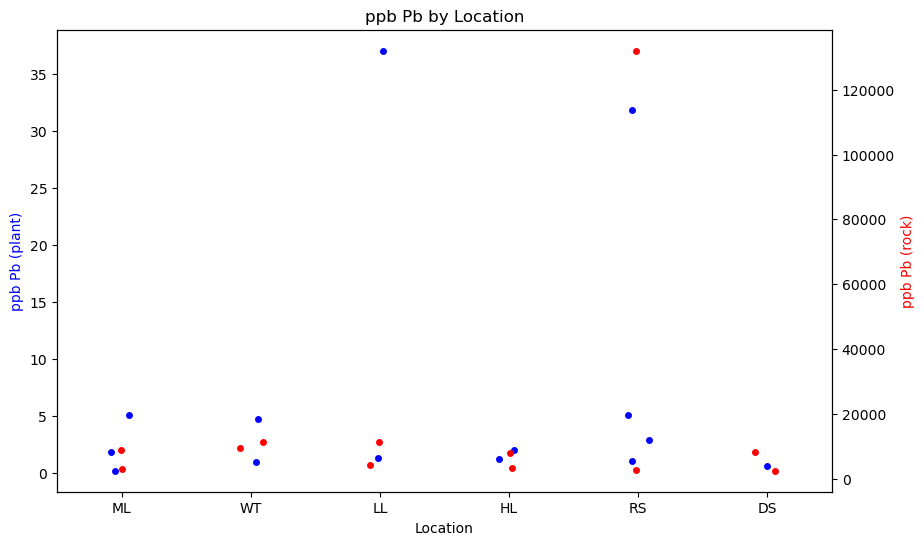

In [ ]:
# Extract the location from the 'Sample name' for the x-axis
df_reset['Location'] = df_reset['index'].str[:2]

# Create the strip plots
fig = plt.figure(figsize=(10, 6))
ax1 = sns.stripplot(x='Location', y='ppb Pb', data=df_reset[df_reset['Sample type'] == 'plant'], jitter=True, color='blue')
ax2 = ax1.twinx()
sns.stripplot(x='Location', y='ppb Pb', data=df_reset[df_reset['Sample type'] == 'rock'], jitter=True, color='red', ax=ax2)
ax1.set_ylabel('ppb Pb (plant)', color='blue')
ax2.set_ylabel('ppb Pb (rock)', color='red')
plt.title('ppb Pb by Location')
plt.xlabel('Location')
plt.show()